In [31]:
import os
import numpy as np
import pandas as pd
import plotly as pl
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math
import pylab
import random

In [32]:
data = pd.read_csv("./insurance.csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [33]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [34]:
# titles = ["mean", "std", "mode", "min", "25%", "50%", "75%", "max"]
print(data.age.describe().to_dict())

fig  = px.bar(data.describe()[1:])
fig.update_layout(xaxis_title="stats", yaxis_title="age")
fig.show()


{'count': 1338.0, 'mean': 39.20702541106129, 'std': 14.049960379216172, 'min': 18.0, '25%': 27.0, '50%': 39.0, '75%': 51.0, 'max': 64.0}


In [35]:
mean_bmi = np.mean(data.bmi)
mean_charges = np.mean(data.charges)

mode_bmi = sts.mode(data.bmi).__getitem__(0)[0]
mode_charges = sts.mode(data.charges).__getitem__(0)[0]

median_bmi = np.median(data.bmi)
median_charges = np.median(data.charges)

print('mean bmi: %f'%mean_bmi)
print('mean charges: %f'%mean_charges)
print('mode bmi: %f'%mode_bmi)
print('mode charges: %f'%mode_charges)
print('median bmi: %f'%median_bmi)
print('median bmi: %f'%median_charges)


fig  = px.bar(y=[mean_bmi, mode_bmi, median_bmi], x=["mean", "mode", "median"], title="bmi")
fig.update_layout(xaxis_title="stats", yaxis_title="index")
fig.show()

fig  = px.bar(y=[mean_charges, mode_charges, median_charges], x=["mean", "mode", "median"], title="charges")
fig.update_layout(xaxis_title="stats", yaxis_title="value")
fig.show()


mean bmi: 30.663397
mean charges: 13270.422265
mode bmi: 32.300000
mode charges: 1639.563100
median bmi: 30.400000
median bmi: 9382.033000


In [36]:
df = data.bmi
fig = px.box(df, points="all")
fig.show()

df = data.age
fig = px.box(df, points="all")
fig.show()

df = data.children
fig = px.box(df, points="all")
fig.show()

df = data.charges
fig = px.box(df, points="all")
fig.show()


In [62]:
df = data.charges
choice = [50, 100, 200, 500]

chargesMeans = []
for _ in range(500):
    samples = data.charges.sample(n=300)
    chargesMean = np.mean(samples)
    chargesMeans.append(chargesMean)

print("samples mean: %f"%np.mean(chargesMeans))
print("original mean: %f"%np.mean(data.charges))

# fig = px.bar(x=[x for x in range(300)], y=chargesMeans, title="charges CTL")
# fig.update_layout(xaxis_title="range", yaxis_title="value")
# fig.show()
# sns.histplot(x=[x for x in range(300)], y=chargesMeans, kde=True);
fig = px.bar(chargesMeans)
fig.show()

samples mean: 13283.085086
original mean: 13270.422265


charges_mean = 13270.422265
charges_std = 12105.484976


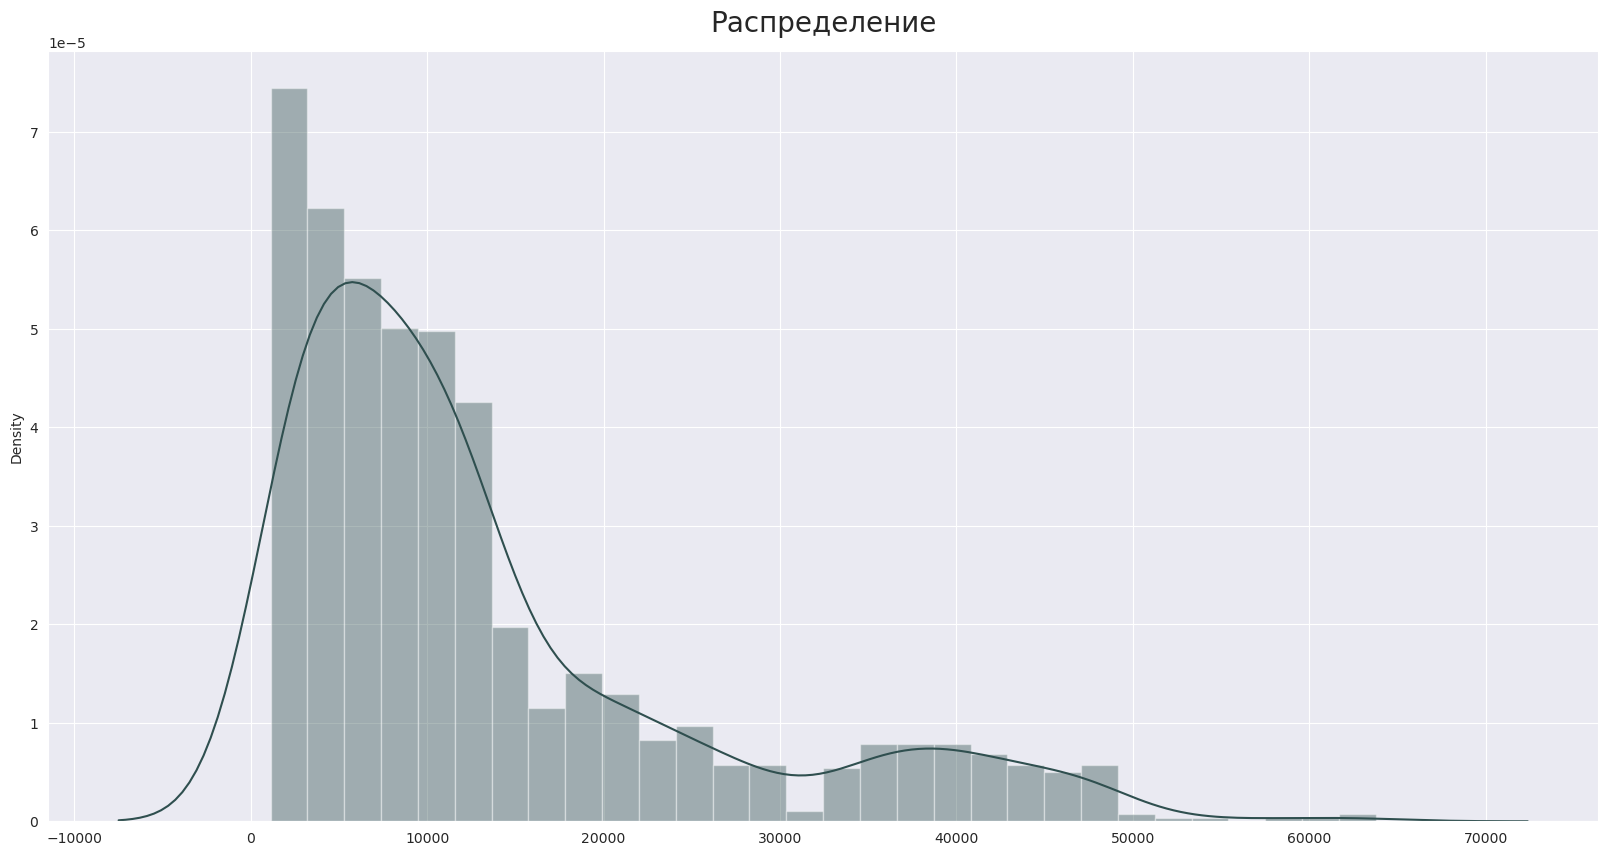

In [63]:
import warnings
warnings.filterwarnings("ignore")

df_charges = data.charges.to_numpy()

pop_mean = df_charges.mean() # Среденее значение
pop_std = df_charges.std() # Стандартное отклонение
print('charges_mean = %f'%pop_mean)
print('charges_std = %f'%pop_std)

fig = plt.figure(figsize=(20, 10))
sns.distplot(df_charges, color="darkslategrey")
plt.title("Распределение", y=1.015, fontsize=20);
plt.show()

choise = 150


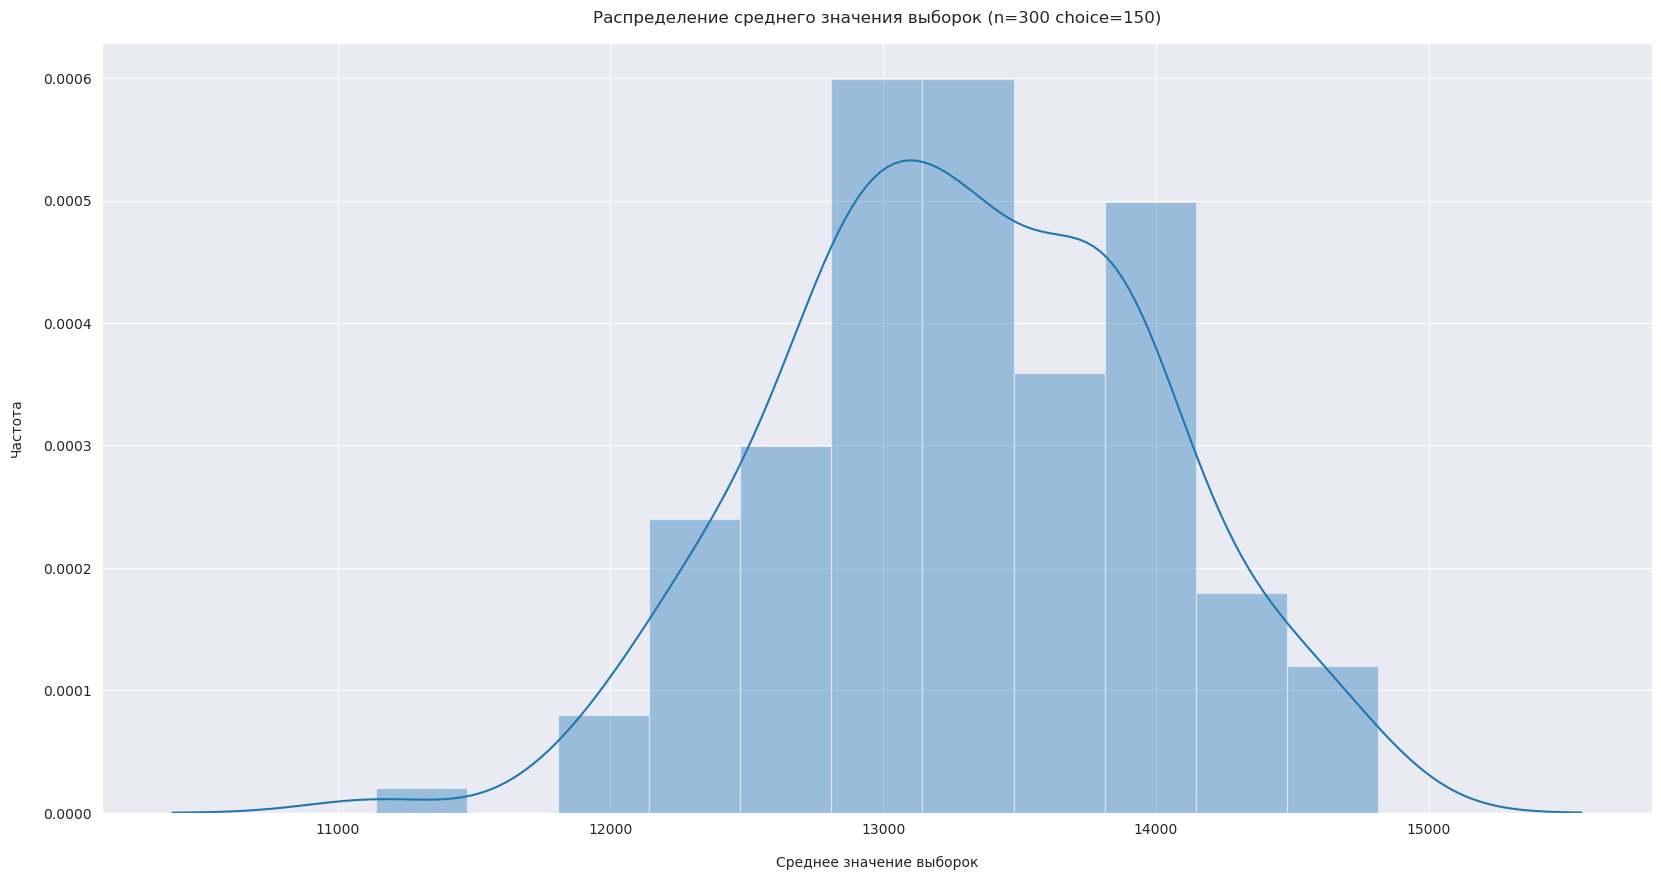

In [65]:
sample_means = [] # список для хранения средних значений выборок
choice = 150
n = 300
for sample in range(0, choice): # Количество выборок
    sample_values = np.random.choice(df_charges, size=n) # Из общего набора взять выборку длинной n
    sample_mean = np.mean(sample_values) # Среднее значение полученной выборки
    sample_means.append(sample_mean)


print("choise = " + str(len(sample_means)))

fig = plt.figure(figsize=(20, 10))
sns.distplot(sample_means)
plt.title(f'Распределение среднего значения выборок (n={n} choice={choice})', y=1.015, fontsize=12)
plt.xlabel("Среднее значение выборок", labelpad=14)
plt.ylabel("Частота", labelpad=14)
plt.show()



charges 95 percent: (12417.649014863586, 14123.195515418927)
charges 99 percent: (12621.54197822916, 13919.302552053354)
bmi 95 percent: (30.33664297153481, 30.990150750438264)
bmi 99 percent: (30.233969458168293, 31.092824263804783)


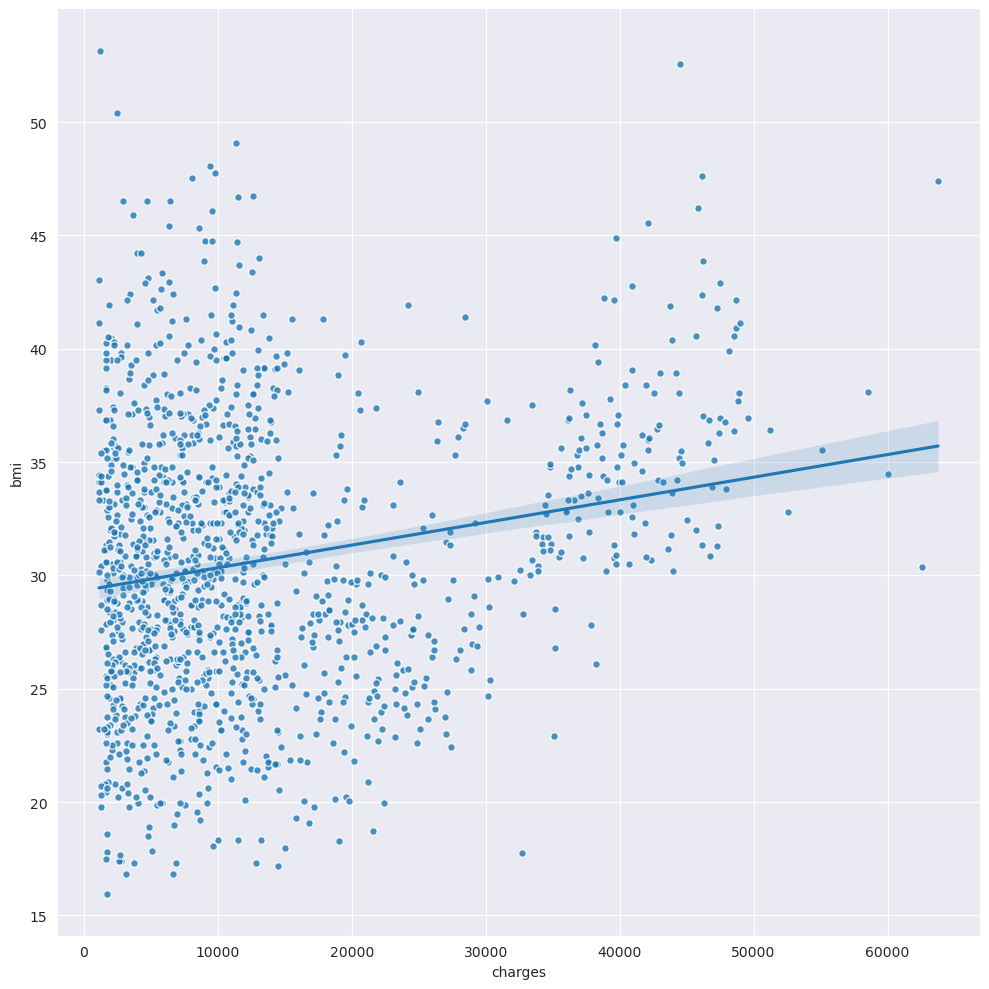

In [122]:

print("charges 95 percent: " + str(sts.norm.interval(0.99, loc=np.mean(data.charges), scale=sts.sem(data.charges))))
print("charges 99 percent: " + str(sts.norm.interval(0.95, loc=np.mean(data.charges), scale=sts.sem(data.charges))))
print("bmi 95 percent: " + str(sts.norm.interval(0.95, loc=np.mean(data.bmi), scale=sts.sem(data.bmi))))
print("bmi 99 percent: " + str(sts.norm.interval(0.99, loc=np.mean(data.bmi), scale=sts.sem(data.bmi))))

fig = sns.lmplot(data=data, x="charges", y="bmi", ci=95,
            scatter_kws={'s': 30, 'edgecolor': 'white'}, height=10)


# sns.regplot(data=data, x="charges", y="bmi", ci= 99)